In [9]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
import time

class Gridworld:
    def __init__(self, board, initial_state = (0,0)):
        self.nrows, self.ncols = len(board),len(board[0])
        self.grid = np.zeros((self.nrows, self.ncols))
        self.is_terminal = False
        
        for i in range(len(board)):
            for j in range(len(board[0])):
                if board[i][j] == "*":
                    self.grid[i][j] = -2
                elif board[i][j] == "+1":
                    self.grid[i][j] = 1
                elif board[i][j] == "+100":
                    self.grid[i][j] = 100
                elif board[i][j] == "-1":
                    self.grid[i][j] = -1
                elif board[i][j] == "-100":
                    self.grid[i][j] = -100
        # self.grid[-1, -1] = 1  # set the final state to have a reward of 1
        # print("grid despues",self.grid)
        self.initial_state = initial_state
        self.state = initial_state
        
    def get_states(self):
        return [(i, j) for i in range(len(self.grid)) for j in range(len(self.grid[0]))]

    def get_current_state(self):
        return self.state

    def get_possible_actions(self, state):
        i, j = state
        actions = []
        if self.grid[state]==0:
            if j > 0 and self.grid[i][j-1] != -2:
                actions.append('down')
            if j < self.ncols - 1 and self.grid[i][j+1] != -2:
                actions.append('up')
            if i > 0 and self.grid[i-1][j] != -2:
                actions.append('left')
            if i < self.nrows - 1 and self.grid[i+1][j] != -2:
                actions.append('right')
        elif self.grid[state] != -2:
            actions.append("end")
        elif self.grid[state] == -2:
            return [None]
        return actions
    
    def get_next_states(self, state, action):
        i, j = state
        reward = 0
        if action == 'left' :
            i -= 1
        elif action == 'right':
            i += 1
        elif action == 'down':
            j -= 1
        elif action == 'up':
            j += 1
        elif action == 'end':
            reward = self.grid[i, j]
        self.state = (i, j)
        return reward, self.state

    def do_action(self, action):
        i, j = self.state
        reward = 0
        if action == 'left' :
            i -= 1
        elif action == 'right':
            i += 1
        elif action == 'down':
            j -= 1
        elif action == 'up':
            j += 1
        elif action == 'end':
            reward = self.grid[i, j]
            
        self.state = (i, j)
        return self.grid[i, j], self.state

    def reset(self):
        self.state = self.initial_state

    def is_terminal(self):
        return self.grid[self.state] == 1
    
    def plot(self):
        fig1 = plt.figure(figsize=(10, 10))
        ax1 = fig1.add_subplot(111, aspect='equal')
        
        # Lineas
        for i in range(0, len(self.grid)+1):
            ax1.axvline(i , linewidth=2, color="#2D2D33")
        for j in range(0, len(self.grid[0])+1):
            ax1.axhline(j , linewidth=2, color="#2D2D33")
        
        # Amarillo - inicio
        ax1.add_patch(patches.Rectangle(self.initial_state, 1, 1, facecolor = "#F6D924"))
        for i in range(len(self.grid)):
            for j in range(len(self.grid[0])):
                if self.grid[i][j] >= 1: # verde
                    ax1.add_patch(patches.Rectangle((i,j), 1, 1, facecolor = "#68FF33"))
                if self.grid[i][j] == -2: # gris
                    ax1.add_patch(patches.Rectangle((i,j), 1, 1, facecolor = "#6c7780"))
                if self.grid[i][j] == -1 or self.grid[i][j] == -100: # rojo
                    ax1.add_patch(patches.Rectangle((i,j), 1, 1, facecolor = "#cc0000"))
        plt.scatter(self.state[0] + 0.5, self.state[1] +0.5, s = 100, color = "black", marker = "o", facecolor = "blue", edgecolors = "blue", zorder = 10)
        for i in range(len(self.grid)):
            for j in range(len(self.grid[0])):
                if self.grid[i, j] == -2:
                    ax1.text(i+0.5, j+0.5, "*", ha='center', va='center')
                else:
                    ax1.text(i+0.5, j+0.5, self.grid[i, j], ha='center', va='center')
        plt.axis("off")
        plt.show()
        
    def get_action_test(self, action):
        if action=='left':
            return '<'
        if action=='right':
            return '>'
        if action=='up':
            return '^'
        if action=='down':
            return 'v'
        if action=='exit':
            return 'x'
        
    def plot_action(self, actions, values):
        fig1 = plt.figure(figsize=(10, 10))
        ax1 = fig1.add_subplot(111, aspect='equal')
        
        # Lineas
        for i in range(0, len(self.grid)+1):
            ax1.axvline(i , linewidth=2, color="#2D2D33")
        for j in range(0, len(self.grid[0])+1):
            ax1.axhline(j , linewidth=2, color="#2D2D33")
        
        # Amarillo - inicio
        ax1.add_patch(patches.Rectangle(self.initial_state, 1, 1, facecolor = "#F6D924"))
        for i in range(len(self.grid)):
            for j in range(len(self.grid[0])):
                if self.grid[i][j] >= 1: # verde
                    ax1.add_patch(patches.Rectangle((i,j), 1, 1, facecolor = "#68FF33"))
                if self.grid[i][j] == -2: # gris
                    ax1.add_patch(patches.Rectangle((i,j), 1, 1, facecolor = "#6c7780"))
                if self.grid[i][j] == -1 or self.grid[i][j] == -100: # rojo
                    ax1.add_patch(patches.Rectangle((i,j), 1, 1, facecolor = "#cc0000"))
        self.reset()
        plt.scatter(self.state[0] + 0.5, self.state[1] +0.5, s = 100, color = "black", marker = "o", facecolor = "blue", edgecolors = "blue", zorder = 10)
        
        for i in range(len(self.grid)):
            for j in range(len(self.grid[0])):
                if self.grid[i, j] == -2:
                    ax1.text(i+0.5, j+0.5, "*", ha='center', va='center')
                else:
                    ax1.text(i+0.5, j+0.75, round(values[i, j],2), ha='center', va='center')
                    text2=self.get_action_test(actions[(i,j)])
                    ax1.text(i+0.5, j+0.25, text2, ha='center', va='center')
        plt.axis("off")
        plt.show()
        

# Métodos de Monte Carlo

En este ejercicio vamos a implementar la primera solución para los problemas de aprendizaje por refuerzo, los métodos de Monte Carlo. 

Recuerde que el método de Monte Carlo consiste en la colección de muestras calculando los valores para la secuencia completa de los estados hasta el estado final. Una vez se han coleccionado "suficientes" muestras, el valor de los estados se toma como el valor promedio de las muestras sobre las cuales apareció el estado.

Para resolver problemas de aprendizaje por refuerzo utilizando el método de Monte Carlo crearemos un archivo `mcm.py`. Inicialmente utilizaremos este archivo para solucionar el problema sobre el ambiente de Gridworld (suponiendo un ruido de `0.25` para las acciones).

**Task 1**
1.	Implemente la classe `MCM` para solucionar Gridworld sin conocer los detalles del modelo de MDP para el problema. Es decir, en este caso, nuestro agente de `MCM` no tendrá acceso al `mdp` como era el caso para la iteración de valores o iteración de políticas.

2. El comportamiento del agente (de Monte Carlo) esta dado por dos momentos. El proceso de recolección de muestras y el proceso de explotación de las mismas, es decir, el cálculo de la política del agente. Usted debe implementar el comportamiento del agente dado que, ejecutando episodios como muestras, sea capaz de calcular los valores para los estados.


In [10]:
class MCM:
    def __init__(self, gridworld, gamma=1, num_episodes=1000, threshold=0.00001):
        # Initialize the MCM object with a Gridworld environment, a discount factor, and the number of episodes to generate
        self.gridworld = gridworld
        self.gamma = gamma
        self.num_episodes = num_episodes
        self.threshold = threshold
        
        # Initialize the value function V to zero for each state in the Gridworld environment
        self.V = np.zeros_like(self.gridworld.grid)
        
        self.prev_V = np.zeros_like(self.gridworld.grid)
        
        # Initialize an empty dictionary to store the rewards for each state-action pair
        self.rewards = {}
        
        # Initialize an empty dictionary to store the optimal policy for each state
        self.policy = {}
        
        # number of iterations to explore
        self.explore = 0
        
        # number of samples
        self.samples = 0
        
    def check_convergence(self):
        if self.explore>2000:
            for state in self.gridworld.get_states():
                if self.V[state] == self.prev_V[state]:
                    return True
        self.explore +=1
        return False

    def generate_episode(self):
        # Generate an episode, i.e., a sequence of (state, action, reward) tuples, using a random policy
        episode = []
        
        # Reset the environment to a random initial state
        self.gridworld.reset()
        # print(self.gridworld.state)
        state = self.gridworld.get_current_state()

        # Iteratively select actions according to a random policy until a terminal state is reached
        done = True
        while done: 
            # Get the set of possible actions for the current state
            possible_actions = self.gridworld.get_possible_actions(state)
            
            # Select an action at random
            action = np.random.choice(possible_actions)
            # print("taken action", action)
            
            # Take the selected action and observe the reward and next state
            reward, next_state = self.gridworld.do_action(action)
            self.samples+=1
            
            # Append the (state, action, reward) tuple to the episode
            episode.append((state, action, reward))
                        
            # Update the current state to the next state
            state = next_state
            
            if action == 'end':
                done = False

        # Return the episode
        return episode

    def calculate_rewards(self, episode):
        # Compute the rewards for each (state, action) pair in an episode, using the discount factor gamma
        G = 0
        rewards = {}

        # Iterate over the (state, action, reward) tuples in the episode in reverse order
        for state, action, reward in reversed(episode):
            # Compute the return for the current (state, action) pair
            G = self.gamma * G + reward
            
            # Update the rewards dictionary for the current state by appending the computed return
            if state not in rewards:
                rewards[state] = []
            rewards[state].append(G)

        # Return the rewards dictionary
        return rewards

    def update_value_function(self):
        # Update the value function for each state in the Gridworld environment, by computing the mean of the rewards for that state
        for state in self.gridworld.get_states():
            # If the state has been visited in any episode, update its value function
            if state in self.rewards:
                # Compute the mean of the rewards for the state and update the corresponding value in the value function V
                self.prev_V[state] = self.V[state]
                self.V[state] = np.mean(self.rewards[state])

    def run(self):
        # Run the MCM algorithm for the specified number of episodes.
        for i in range(self.num_episodes):
            # print(i)
            episode = self.generate_episode()
            rewards = self.calculate_rewards(episode)
            
            # Update the rewards dictionary with the computed rewards for each state.
            for state in rewards:
                if state not in self.rewards:
                    self.rewards[state] = []
                self.rewards[state].extend(rewards[state])
                
            # Update the value function using the updated rewards dictionary.
            self.update_value_function()
            # print(self.V)
            if self.check_convergence():
                print("Convergio en el episodio",i)
                break
        
        # Compute the policy for each state based on the updated value function.
        for state in self.gridworld.get_states():
            possible_actions = self.gridworld.get_possible_actions(state)
            if len(possible_actions) > 0:
                values = []
                for action in possible_actions:
                    reward, next_state = self.gridworld.get_next_states(state, action)
                    value = reward + self.gamma * self.V[next_state]
                    values.append(value)
                best_action = possible_actions[np.argmax(values)]
                self.policy[state] = best_action
        
        # Return the updated value function and policy.
        return self.V, self.policy


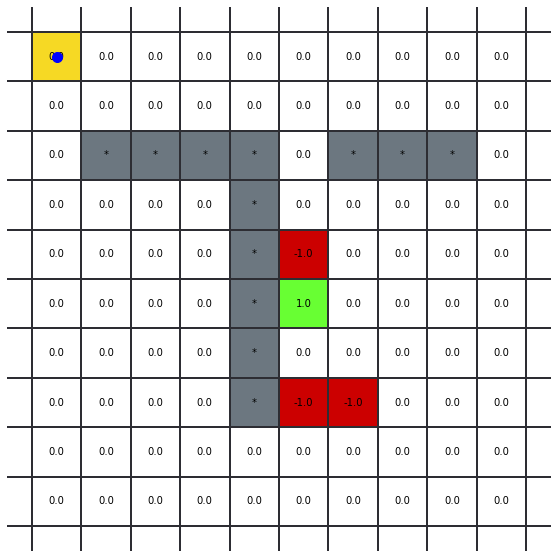

In [11]:
board = [
    [' ', ' ', ' ', ' ', ' ',' ', ' ', ' ', ' ', ' '],
    [' ', ' ', ' ', ' ', ' ',' ', ' ', '*', ' ', ' '],
    [' ', ' ', ' ', ' ', ' ',' ', ' ', '*', ' ', ' '],
    [' ', ' ', ' ', ' ', ' ',' ', ' ', '*', ' ', ' '],
    [' ', ' ', '*', '*', '*','*', '*', '*', ' ', ' '],
    [' ', ' ', '-1', ' ', '+1','-1', ' ', ' ', ' ', ' '],
    [' ', ' ', '-1', ' ', ' ',' ', ' ', '*', ' ', ' '],
    [' ', ' ', ' ', ' ', ' ',' ', ' ', '*', ' ', ' '],
    [' ', ' ', ' ', ' ', ' ',' ', ' ', '*', ' ', ' '],
    [' ', ' ', ' ', ' ', ' ',' ', ' ', ' ', ' ', ' '],
]

initial_state = (0, 9)

env = Gridworld(board, initial_state)

env.plot()

In [12]:
mcm = MCM(env, gamma=0.9, num_episodes=2500)
V, policy = mcm.run()
print(V)
print()
print(policy)

Convergio en el episodio 2001
[[-0.0431712  -0.03135965 -0.02188857 -0.01477023 -0.00980033 -0.00772818
  -0.00597794 -0.00660882 -0.01043767 -0.01146952]
 [-0.05720917 -0.04369936 -0.02916858 -0.01986322 -0.01214005 -0.00837427
  -0.00583941  0.         -0.01605246 -0.01519153]
 [-0.10207927 -0.08731712 -0.04843525 -0.02698794 -0.01489478 -0.00899808
  -0.00651505  0.         -0.0263359  -0.02446431]
 [-0.18809251 -0.18275542 -0.08021146 -0.03829502 -0.01898786 -0.01039491
  -0.00797293  0.         -0.04721684 -0.040079  ]
 [-0.34698307 -0.42939272  0.          0.          0.          0.
   0.          0.         -0.08602849 -0.0628711 ]
 [-0.58205762 -0.93553153 -1.          0.11525882  1.         -1.
  -0.91707144 -0.5024952  -0.17539159 -0.09000068]
 [-0.5941778  -0.97699913 -1.         -0.45671578  0.2953997  -0.55477699
  -0.51138328  0.         -0.09220799 -0.06712747]
 [-0.4165003  -0.57289471 -0.73416149 -0.35605416 -0.04133238 -0.22013557
  -0.27869842  0.         -0.0570437 

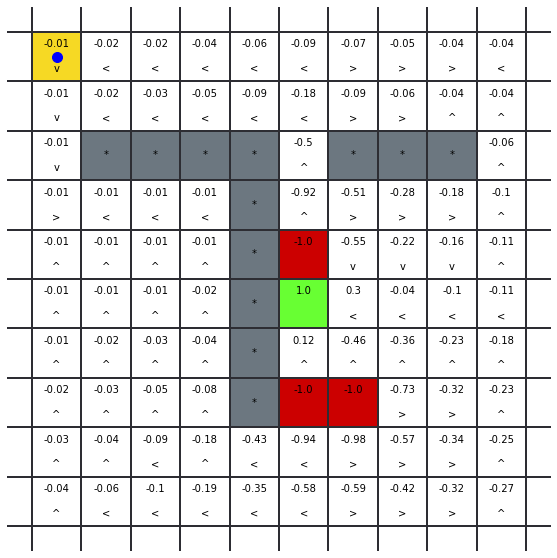

In [13]:
env.plot_action(policy, V)

**Task 2**

Para la implementación de `MCM` responda las siguientes preguntas. Tenga en cuenta que debe ejecutar su agente múltiples veces para poder observar el comportamiento (una sola instancia no nos puede llevar a ninguna conclución).
Justifique su respuestas con análisis de la ejejcución y gráficas del comportamiento.
1. **¿Cuantas muestras debe tomar el agente? Su implementación no debe utilizar este número como un parámetro o tenerlo como un factor predeterminado del agente.**

La cantidad de muestras que el agente debe tomar, se toma como la cantidad de estados en los que toma datos para generar la convergencia, de acuerdo a:

<img src="img/img1.png" alt="Alternative text" width = 500 />

Esto tiende a variar, pues llega a al rededor de 2000 episodios, que son:

In [14]:
mcm.samples

420765

2. **¿Cómo se comparan los valores de `MCM` con respecto a los valores obtenidos en el ejercicio de iteración de valores `value_iteration`? ¿Porqué se da la diferencia si existe alguna, o porqué no existe ninguna diferencia?**

El método de Monte Carlo se basa en la simulación de múltiples episodios (o ejecuciones) del problema, donde se realizan elecciones aleatorias para seleccionar acciones y se observan las recompensas obtenidas. Luego, a partir de las estadísticas de las recompensas obtenidas en los episodios simulados, se pueden estimar los valores de las acciones o estados del problema. Por otro lado, el método de iteración de valores se basa en la construcción de una tabla de valores que representa la utilidad esperada de cada estado en el problema. El método utiliza la propiedad de optimalidad de Bellman para actualizar iterativamente los valores de los estados, hasta que convergen a los valores óptimos.

Sin embargo, en general, el método de Monte Carlo puede ser más preciso en la estimación de los valores de los estados pero requiere mucho mas tiempo de entrenamiento, ya que se basa en la simulación de múltiples episodios y puede capturar mejor la variabilidad y la incertidumbre del problema. Además, el método de Monte Carlo no requiere conocer el modelo de transición de estados o el mdp como si lo requiere el `value_iteration`, lo que puede ser útil en situaciones donde el modelo es desconocido o complejo de especificar.

Por otro lado, el método de iteración de valores puede ser más eficiente en términos computacionales, ya que solo requiere actualizar la tabla de valores en cada iteración, en lugar de realizar simulaciones de episodios completos. Además, el método de iteración de valores puede ser más fácil de implementar y entender para problemas simples. Y para el caso especifico de este ejercicio, tiende a ser mejor por su rapidez.

3. **¿Cómo se compara la política obtenida utilizando `MCM` con respecto a la política obtenida en el ejercicio de iteración de políticas `policy_iteration`? ¿Porqué se da la diferencia si existe alguna, o porqué no existe ninguna diferencia?**

El método de Monte Carlo, como se dijo anteriormente, se basa en la simulación de múltiples episodios (o ejecuciones) del problema, donde se realizan elecciones aleatorias para seleccionar acciones y se observan las recompensas obtenidas. Por otro lado, el método de iteración de políticas se basa en la construcción iterativa de una política que maximice los valores de los estados en el problema. En cada iteración, se evalúa la política actual para obtener una tabla de valores, y luego se mejora la política al seleccionar acciones que maximicen los valores de los estados, utilizando la propiedad de optimalidad de Bellman.

La política obtenida mediante el método de Monte Carlo puede ser más precisa en situaciones donde el modelo del problema es desconocido o complejo, ya que no se requiere conocer el modelo de transición de estados para estimar los valores de los estados y la política óptima. Además, el método de Monte Carlo puede ser más adecuado para problemas con estados continuos o grandes, ya que no requiere construir una tabla de valores explícita.

Por otro lado, el método de iteración de políticas puede ser más eficiente en términos computacionales, ya que converge más rápidamente que el método de Monte Carlo, especialmente para problemas con pocos estados y acciones. Además, el método de iteración de políticas proporciona una política óptima explícita, mientras que el método de Monte Carlo solo proporciona una estimación de la política óptima.

4. **¿Cuál es el efecto de del factor de descuento sobre el método de Monte Carlo, calcule la solución de Gridworld con diferentes valores?**

El factor de descuento es un parámetro que se utiliza en los algoritmos de aprendizaje por refuerzo, incluyendo el método de Monte Carlo, para determinar la importancia relativa de las recompensas a corto y largo plazo. El factor de descuento se denota por gamma (γ) y tiene un valor entre 0 y 1, donde un valor cercano a 0 significa que las recompensas a largo plazo tienen poco peso, mientras que un valor cercano a 1 significa que las recompensas a largo plazo tienen un mayor peso en la toma de decisiones.

El efecto del factor de descuento sobre el método de Monte Carlo es que puede influir en la convergencia y la estabilidad del algoritmo. Un factor de descuento alto (cerca de 1) significa que se le da más importancia a las recompensas a largo plazo, lo que puede hacer que el algoritmo sea más lento para converger, ya que las recompensas a largo plazo son más inciertas. Por otro lado, un factor de descuento bajo (cerca de 0) significa que se le da menos importancia a las recompensas a largo plazo, lo que puede hacer que el algoritmo converja más rápido, pero también puede llevar a una política subóptima que no tenga en cuenta las recompensas a largo plazo.

En general, el factor de descuento adecuado dependerá del problema en particular y de la preferencia del agente en cuanto a la importancia de las recompensas a corto y largo plazo. Un valor de gamma comúnmente utilizado es 0.9, lo que significa que las recompensas a largo plazo tienen un peso significativo en la toma de decisiones, pero también se tienen en cuenta las recompensas a corto plazo. Sin embargo, es importante probar diferentes valores de gamma para determinar el valor óptimo para cada problema en particular.

Para el caso especifico de gridworld, el algoritmo converge más rapido con 0.1 (entre mas pequeño el gama), pero los valores tan exactos, mientras que entre mas grande, los valores son mas exactos.

Valor de descuento 0.1
Convergio en el episodio 2001
Tiempo de duracion en ejecutar el algorimo 35.18979597091675


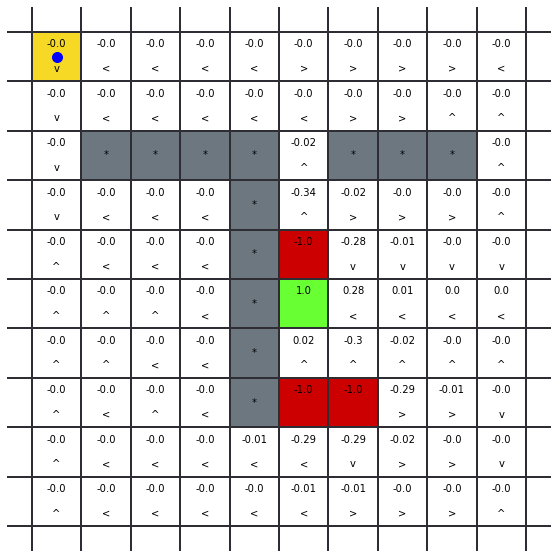

In [15]:
print("Valor de descuento 0.1")
inicio = time.time()
mcm = MCM(env, gamma=0.1, num_episodes=2500)
V, policy = mcm.run()
fin = time.time()
print("Tiempo de duracion en ejecutar el algorimo", fin-inicio)
env.plot_action(policy, V)

Valor de descuento 0.9
Convergio en el episodio 2001
Tiempo de duracion en ejecutar el algorimo 36.12997317314148


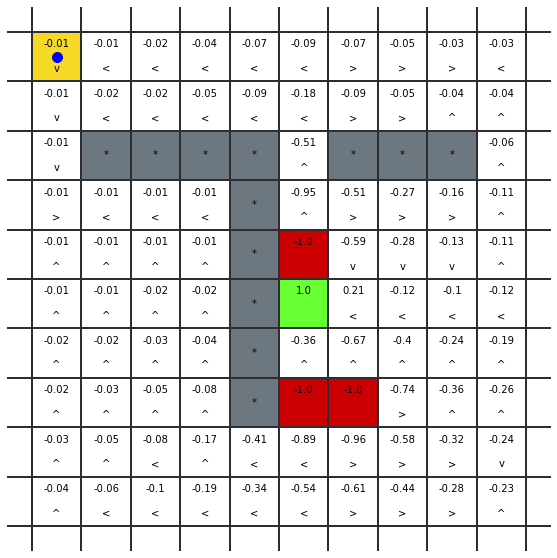

In [16]:
print("Valor de descuento 0.9")
inicio = time.time()
mcm = MCM(env, gamma=0.9, num_episodes=2500)
V, policy = mcm.run()
fin = time.time()
print("Tiempo de duracion en ejecutar el algorimo", fin-inicio)
env.plot_action(policy, V)